### Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data from admissions.csv 

In [2]:
!!cd

['c:\\classroom\\aug26\\admission']

In [3]:
df = pd.read_csv("admission.csv")

#### Understand data 

In [4]:
df.sample(5)

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
425,426,323,111,5,4.0,5.0,9.86,1,0.92
245,246,328,110,4,4.0,2.5,9.02,1,0.81
71,72,336,112,5,5.0,5.0,9.76,1,0.96
142,143,331,115,5,4.0,3.5,9.44,1,0.92
472,473,327,116,4,4.0,4.5,9.48,1,0.90


In [5]:
df.shape

(500, 9)

In [6]:
# drop column Sno as it is not imp.
df.drop(columns=['Sno'], inplace=True) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gre       500 non-null    int64  
 1   Toefl     500 non-null    int64  
 2   Rating    500 non-null    int64  
 3   Sop       500 non-null    float64
 4   Lor       500 non-null    float64
 5   Cgpa      500 non-null    float64
 6   Research  500 non-null    int64  
 7   Chance    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
df.describe()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Data Visualization 

### Univariate Analysis

In [9]:
df['Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: Rating, dtype: int64

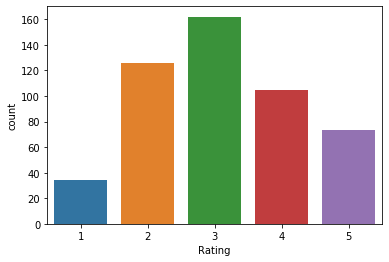

In [10]:
sns.countplot(x="Rating", data = df)

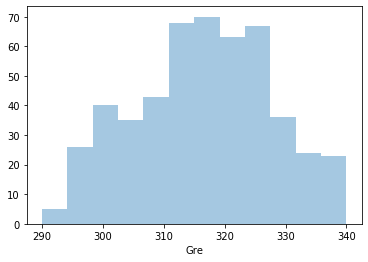

In [11]:
sns.distplot(df.Gre, kde=False)

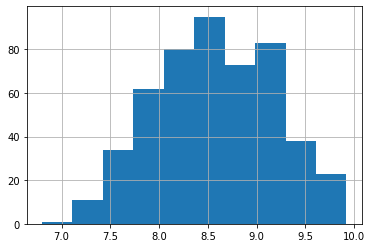

In [12]:
df['Cgpa'].hist()

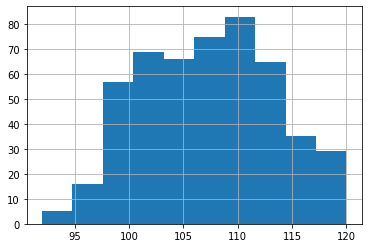

In [13]:
df['Toefl'].hist()

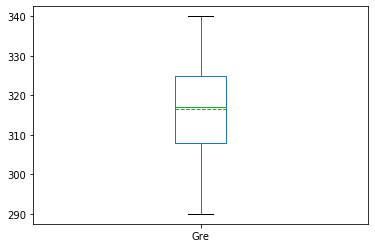

In [14]:
df.Gre.plot.box(showmeans=True, meanline=True)

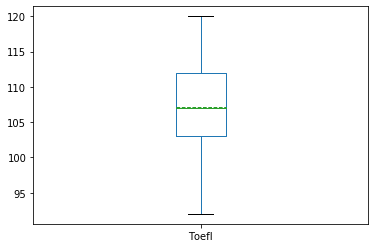

In [15]:
df.Toefl.plot.box(showmeans=True, meanline=True)

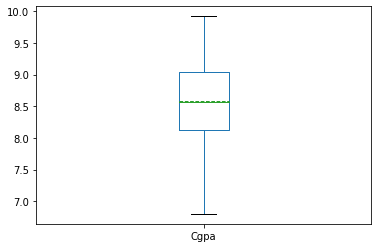

In [16]:
df.Cgpa.plot.box(showmeans=True, meanline=True)

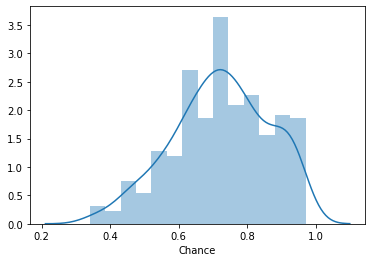

In [17]:
sns.distplot(df.Chance)

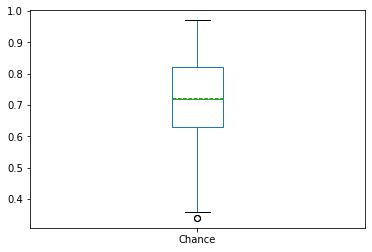

In [18]:
df.Chance.plot.box(showmeans=True, meanline=True)

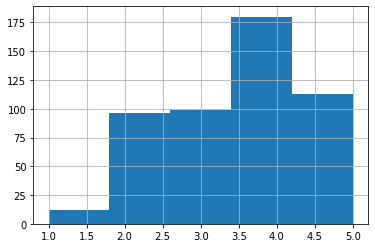

In [19]:
df.Lor.hist(bins=5)

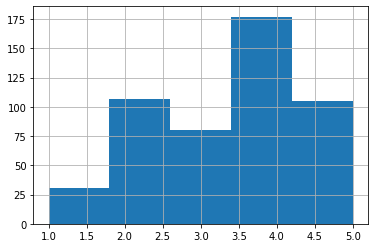

In [20]:
df.Sop.hist(bins=5)

In [21]:
df.Sop.value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: Sop, dtype: int64

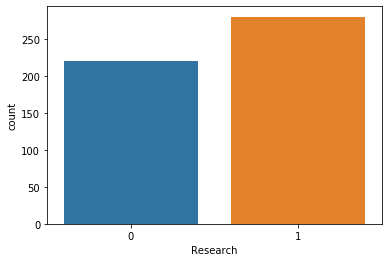

In [22]:
sns.countplot(x="Research", data =df)

In [23]:
df.Research.value_counts()

1    280
0    220
Name: Research, dtype: int64

### Bi-variate Ananlysis

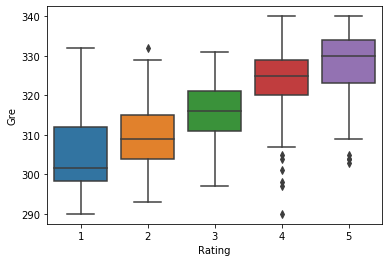

In [24]:
sns.boxplot(y="Gre", x="Rating", data=df)   # Compare categorical with continous variable 

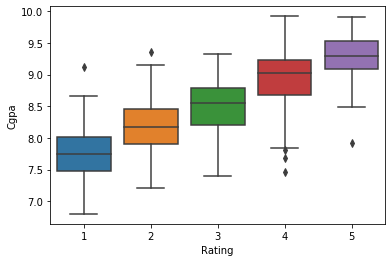

In [25]:
sns.boxplot(y="Cgpa", x ="Rating", data=df)

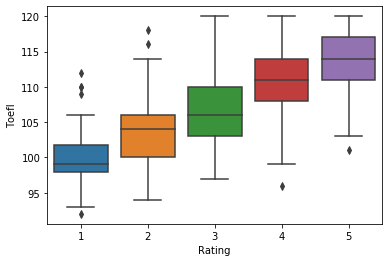

In [26]:
sns.boxplot(y="Toefl", x ="Rating", data=df)

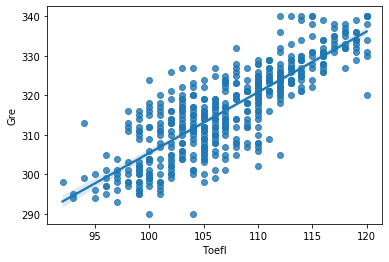

In [27]:
sns.regplot(x="Toefl", y="Gre", data = df)

In [28]:
df[['Gre','Toefl','Cgpa']].corr()

,Gre,Toefl,Cgpa
Gre,1.000000,0.827200,0.825878
Toefl,0.827200,1.000000,0.810574
Cgpa,0.825878,0.810574,1.000000


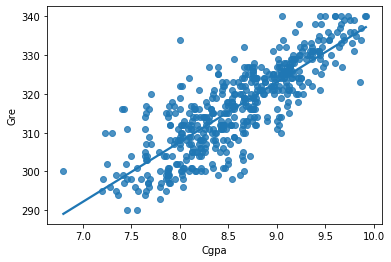

In [29]:
sns.regplot(x='Cgpa',y = 'Gre', data  = df, ci = False)

In [ ]:
sns.regplot(data=df, x='Cgpa',y='Chance') 

In [ ]:
sns.lmplot(data=df, x='Cgpa',y='Chance', hue="Rating" , ci=False) 

In [ ]:
sns.lmplot(data=df, x='Gre',y='Chance',col="Rating", ci = False) 

In [ ]:
sns.lmplot(data=df, x='Cgpa',y='Chance',col="Rating", ci=False) 

In [ ]:
sns.scatterplot(data=df, x='Gre',y='Sop') 

In [ ]:
corrmat = df.corr()

In [ ]:
corrmat

In [ ]:
corrmat['Chance'].sort_values(ascending=False)

In [ ]:
sns.heatmap(corrmat,annot=True)
plt.gcf().set_size_inches(10,5)

### Build Machine Learning Model 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['Gre','Toefl','Cgpa']]
y = df['Chance'] * 100

In [ ]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train.index

In [ ]:
## Fit model or Train Model or Build model 
lr_model = LinearRegression()
lr_model.fit(X_train,y_train) 

In [ ]:
lr_model.coef_  # Slopes

In [ ]:
lr_model.intercept_

### Evaluate Model with Train data

In [ ]:
lr_model.score(X_train,y_train)   # R2 Score

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred = lr_model.predict(X_train)

In [ ]:
y_pred[:10]  # Predicted

In [ ]:
y_train[:10]  # Actual

In [ ]:
mse = mean_squared_error(y_train,y_pred)
print("MSE   :" ,mse )
print("RMSE  :" ,np.sqrt(mse))

In [ ]:
result = pd.DataFrame( {"Actual" : y_train, "Predicted" : y_pred})
result.head()

In [ ]:
## Draw scatter plot with blue and red dots for actual and predicted 

In [ ]:
plt.scatter(result.index[:50], result['Actual'].head(50), color='blue')
plt.scatter(result.index[:50], result['Predicted'].head(50), color='red')

### Evaluate with Test data

In [ ]:
## Evaluate Model using test data 
y_pred = lr_model.predict(X_test)

In [ ]:
lr_model.score(X_test,y_test)

In [ ]:
res = pd.DataFrame({'Actual' : y_test, 'Pred' : y_pred})

In [ ]:
res.head(10)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("MSE   :" ,mse )
print("RMSE  :" ,np.sqrt(mse))

In [ ]:
plt.scatter(res.index, res['Actual'], color='green')
plt.scatter(res.index, res['Pred'], color='red')
plt.gcf().set_size_inches(15,10)

In [ ]:
plt.gcf().set_size_inches(15,10)
sns.lineplot(res.index, res['Actual'], color='green', label="Actual")
sns.lineplot(res.index, res['Pred'], color='red', label='Predicted')

In [ ]:
## get MSE, R2 and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mse = mean_squared_error(res['Actual'], res['Pred'])
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"RMSE : {rmse:0.2f}")

mae = mean_absolute_error(res['Actual'], res['Pred'])
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(res['Actual'], res['Pred'])
print(f"R2 Score: {r2score:0.2f}")

## pickle model

In [ ]:
pd.to_pickle(lr_model,'lr_model.pickle')